In [1]:
import baltic as bt
import requests
from io import StringIO as sio

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Polygon, PathPatch
from matplotlib.path import Path
from matplotlib.collections import LineCollection
from matplotlib import cm
import matplotlib.patheffects as path_effects

import numpy as np

from datetime import datetime as dt
import os

import PyAstronomy
from PyAstronomy import pyasl
import datetime

import seaborn as sns



import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Polygon


from scipy import stats
import pandas as pd

def get_all_terminals(node):
    terminals = []
    for i in node.children:
        if i.branchType == "leaf":
            terminals.append(i)
        if i.branchType != "leaf":
            terminals.extend(get_all_terminals(i))
    return terminals


treeFile="Alles_MCC.nwk" ## stream from repo copy

ll=bt.loadNexus(treeFile) ## treeFile here can alternatively be a path to a local file
ll.traverse_tree()
ll.treeStats()
ll.sortBranches()

for i in ll.Objects:
    if i.branchType == "leaf":
        if "VSP" in i.name:
            i.traits["rate_signDistribution"]="NEW"
        elif "TRM" in i.name:
            i.traits["rate_signDistribution"]="NEW"
        else:
            i.traits["rate_signDistribution"]="NO"



ancestor=ll.commonAncestor(ll.getExternal(lambda k: k.name in 
                                          ['OP612683|MPXV|Nigeria|Delta|2019-04-18', 
                                           'unpub|MPXV|VSP203|Nigeria|CrossRiver|2023-02-20'])) ## identify common ancestor node of two (or more) tips

ll.collapseSubtree(ancestor,'hMPX1',widthFunction=lambda x:3)



Tree height: 135.241080
Tree length: 585.106129
strictly bifurcating tree
annotations present

Numbers of objects in tree: 401 (200 nodes and 201 leaves)



In [2]:
burin=int(round(len(AH)*0.1,0))
LinC=2023.4137-AH["tMRCA(Lineage_c)"][burin:]
LinC_1971=2023.4137-AH["tMRCA(Lineage_c_1971)"][burin:]
Abia_human=2023.4137-AH["tMRCA(hMPXV-1_Abia)"][burin:]

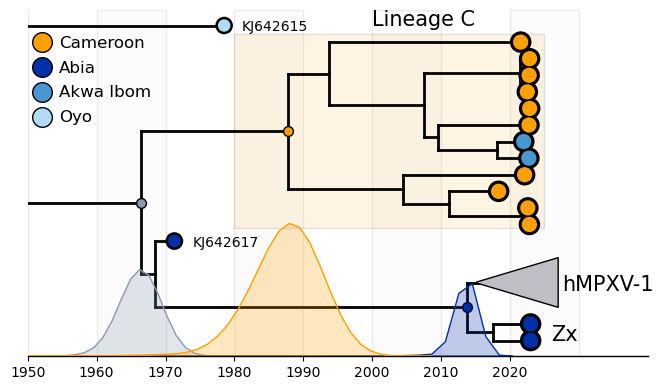

In [33]:
fig, ax1 = plt.subplots(figsize=(8, 4.5))
ll.traverse_tree()
ll.sortBranches(descending=False)

for xx in range(1860, 2030, 20):
    plt.axvspan(xx, xx+10, facecolor='#F5F5F5', alpha=0.3, zorder=1, edgecolor="#C0C0C0")

x_attr=lambda k: k.absoluteTime 
c_func=lambda k: 'black' 
cmap=mpl.cm.viridis

x_attr2=[]
for i in ll.Objects:
    if i.branchType == "node":
        if "posterior" in i.traits:
            if i.traits["posterior"] >= 0.80:
                x_attr2.append([i.absoluteTime, i.y, i.traits["posterior"]])
                
x_attr3=[]
for i in ll.Objects:
    if i.branchType == "node":
        nds=[[2023.4137-x for x in i.traits['height_95%_HPD']], i.y]
        x_attr3.append([nd for nd in nds])
        
s_func=lambda k: 150-30*k.height/ll.treeHeight if k.traits['rate_signDistribution']=='NEW' else 100-30*k.height/ll.treeHeight
effects=[path_effects.Stroke(linewidth=2, foreground='white'),
                 path_effects.Stroke(linewidth=0.5, foreground='black')]
kwargs={'ha':'left','va':'center','size':8,'path_effects':effects}

text_func=lambda k: k.name
t_target=lambda k: k.branchType=='leaf'
n_target=lambda k: k.branchType=='node' and len(k.children)==1

def  c_func2(k):
    if "Cameroon" in k.name:
        cc='#FFA000'
    elif "Abia" in k.name:
        cc="#002FA7"
    elif "Akwa" in k.name:
        cc="#4997D0"
    elif "615" in k.name:
        cc="#AFDBF5"
    else:
        cc="black"

    return(cc)
        

ll.plotTree(ax1,x_attr=x_attr,colour=c_func) 
ll.plotPoints(ax1,x_attr=x_attr,size=s_func,colour=c_func2,zorder=100) 


for k in ll.Objects: 
    if isinstance(k,bt.clade): 
        x=2023.4137-k.traits['height']
        y=k.y
        clade=plt.Polygon(([x,y-0.001*len(ll.Objects)],
                           [x,y+0.001*len(ll.Objects)],
                           [2027,y+k.width/2.0],
                           [2027,y-k.width/2.0]),
                          facecolor='#BEBFC5',edgecolor='black',zorder=12) 

        ax1.add_patch(clade)

ax1.text(1974, 6.2, s="KJ642617", fontsize=10)
ax1.text(1981, 19.2, s="KJ642615", fontsize=10)
ax1.text(2026, 0.5, s="Zx", fontsize=15)
ax1.text(2027.5, 3.5, s="hMPXV-1", fontsize=15)
ax1.tick_params(axis='x',labelsize=10)
plt.xticks([xx for xx in range(1860, 2030, 10)])
ax1.set_xticklabels([xx for xx in range(1860, 2030, 10)])

clade=plt.Polygon(([1980,7.3],
                   [1980,19],
                   [2025,19],
                   [2025, 7.3]),
                  facecolor='#FFA000',edgecolor='black',zorder=1, alpha=0.1) 
ax1.add_patch(clade)

ax2_1 = ax1.twinx()
ax2_2 = ax1.twinx()
ax2_3 = ax1.twinx()

ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.scatter(1952,17,s=200,color='#002FA7',zorder=1, edgecolor='black')
ax1.text(1954.5, 16.65, "Abia", size=12)
ax1.scatter(1952,15.5,s=200,color='#4997D0',zorder=1, edgecolor='black')
ax1.text(1954.5, 15.2, "Akwa Ibom", size=12)
ax1.scatter(1952,14,s=200,color='#AFDBF5',zorder=1, edgecolor='black')
ax1.text(1954.5, 13.7, "Oyo", size=12)
ax1.scatter(1952,18.5,s=200,color='#FFA000',zorder=1, edgecolor='black')
ax1.text(1954.5, 18.17, "Cameroon", size=12)
ax1.set_xlim(1950, 2040) 


ax2_1.spines['left'].set_visible(False)
ax2_1.spines['right'].set_visible(False)
ax2_1.spines['top'].set_visible(False)
ax2_1.yaxis.set_visible(False)
ax2_2.spines['left'].set_visible(False)
ax2_2.spines['right'].set_visible(False)
ax2_2.spines['top'].set_visible(False)
ax2_2.yaxis.set_visible(False)
ax2_3.spines['left'].set_visible(False)
ax2_3.spines['right'].set_visible(False)
ax2_3.spines['top'].set_visible(False)
ax2_3.yaxis.set_visible(False)


sns.kdeplot(LinC_1971, ax=ax2_1, color='#8d99ae', shade=True, alpha=0.25)
sns.kdeplot(Abia_human, ax=ax2_2, color='#002FA7', shade=True, alpha=0.25, bw_adjust=1.5)
sns.kdeplot(LinC, ax=ax2_3, color='#FFA000', shade=True, alpha=0.25)


ax2_1.set_ylim(0, 0.5)
ax2_2.set_ylim(0, 1)
ax2_3.set_ylim(0, 0.2)
ax2_1.set_yticklabels([])
ax2_2.set_yticklabels([])
ax2_3.set_yticklabels([])

ax1.scatter(1966.413551030976,8.8046875,s=50,color="#8d99ae",zorder=10, edgecolor='black')
ax1.scatter(1987.7730295309277,13.109375,s=50,color="#FFA000",zorder=10, edgecolor='black')
ax1.scatter(2013.7565279347125,2.5,s=50,color="#002FA7",zorder=10, edgecolor='black')
ax1.text(2000, 19.5, "Lineage C", size=15)


ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2_1.spines['left'].set_visible(False)
ax2_1.spines['right'].set_visible(False)
ax2_1.spines['top'].set_visible(False)
ax2_2.spines['left'].set_visible(False)
ax2_2.spines['right'].set_visible(False)
ax2_2.spines['top'].set_visible(False)
ax2_3.spines['left'].set_visible(False)
ax2_3.spines['right'].set_visible(False)
ax2_3.spines['top'].set_visible(False)


ax1.yaxis.set_visible(False)



plt.savefig("tMRCA_Zoo.png",bbox_inches='tight', dpi=1000)   
